# Spam or ham classification of Message

In [1]:
from IPython.display import Image
Image(url= "https://st12.ning.com/topology/rest/1.0/file/get/2808327721?profile=original")

## Problem description

Natural Language Processing is one of the fields of Artificial Intelligence that has been in a boom from past 2-3 years. NLP also has proved its capacity of being one of the most used technologies in the future. The automation with text has drawn attention of lot of researchers and engineers. One of the important tasks of NLP is spam or ham detection of mails or messages. This is already implemented in lot of places like Gmail or mobile messages. This implementation will save a lot of memory and time by displaying only the Ham messages to the user. The text is converted to embedding or a vector understandable by the classifier algorithm after going through series of NLP pre-processing and filtering to improve the quality of information. There are lot of vectorizer used for that task, most commonly used vectorizer are count-vectorizer, TF-IDF, Bag of words, Glove etc"

# Data Collection

Training and testing dataset is collected from kaggle and can be directly downloaded form the link given below

link-https://www.kaggle.com/uciml/sms-spam-collection-dataset

## Loading and preparing the data

In [2]:
import pandas as pd
df=pd.read_csv("F:\\data\\spam.csv",encoding = 'latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
from sklearn import preprocessing

In [7]:
y=df.v1
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [8]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

In [9]:
y_enc

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
len(y_enc)

5572

In [11]:
import numpy as np
y_enc=np.array(y_enc)
y_enc

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
type(y_enc)

numpy.ndarray

In [13]:
df.v1=y_enc

In [14]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Data Analysis and Visualization

In [15]:
raw_text=df.v2

In [16]:
raw_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [17]:
raw_text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [18]:
raw_text[245]

"Too late. I said i have the website. I didn't i have or dont have the slippers"

In [19]:
df.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [20]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [21]:
print(raw_text.describe())

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: v2, dtype: object


In [22]:
counts=df.v1.value_counts()
counts

0    4825
1     747
Name: v1, dtype: int64

In [23]:
import seaborn as sns

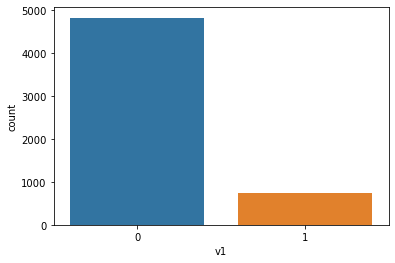

In [24]:
ax = sns.countplot(x=df.v1)

In [25]:
import matplotlib as plt

In [26]:
df.columns=['label', 'msg']

In [27]:
sms=df

In [28]:
sms.head()

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
sms["length"] = sms["msg"].apply(len)

In [30]:
sms.head()

,label,msg,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


C:\Users\chaitanya\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

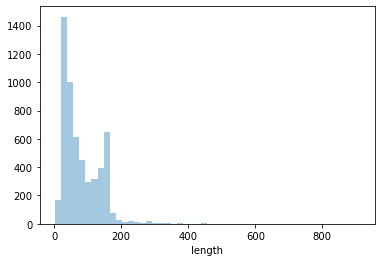

In [31]:
sns.distplot(sms["length"], kde=False)

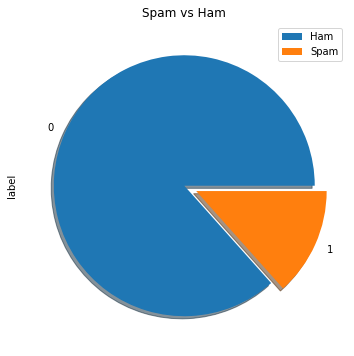

In [32]:
import matplotlib.pyplot as plt
sms["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

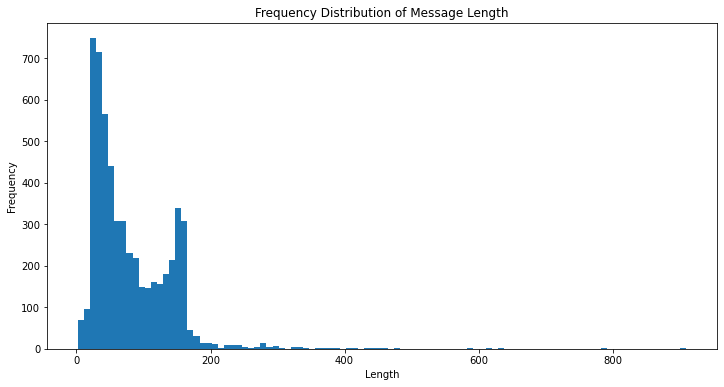

In [33]:
plt.figure(figsize=(12,6))
sms['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [34]:
sms['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

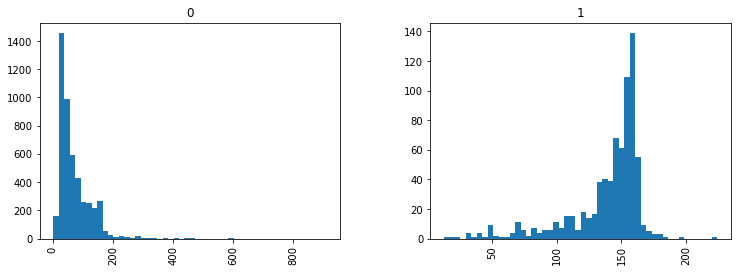

In [35]:
sms.hist(column='length', by='label', bins=50,figsize=(12,4))


**length of messages in spam(1) and ham(0)**

## Text pre-processing

In [36]:
sms

,label,msg,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [37]:
group=sms.groupby('label')

In [38]:
sms_spam=group.get_group(1).msg

In [39]:
sms_spam

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: msg, Length: 747, dtype: object

In [40]:
sms_ham=group.get_group(0).msg

In [41]:
sms_ham

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: msg, Length: 4825, dtype: object

In [42]:
len(sms_spam)

747

In [43]:
sms_spam=np.array(sms_spam)
sms_spam

array(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
       'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
       'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
       'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
       'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
       'XXXMobileMovieClub:

In [44]:
len(sms_spam)

747

In [45]:
sms_spam[0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [46]:
sms_ham=np.array(sms_ham)
sms_ham

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       'U dun say so early hor... U c already then say...', ...,
       'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [47]:
len(sms_ham)

4825

In [48]:
sms_ham[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import string
translate_table = dict((ord(char), None) for char in string.punctuation)  
lemmatizer = WordNetLemmatizer()
spam_sent_tokens=[]
spam_token_stopped=[]
spam_token_stop_lemma=[]
stopwords=stopwords.words('english')

In [50]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
import re
contractions_dict = {
    "didn't": 'did not',
     "don't": 'do not',
    "we've":'we have',"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": " he would",
"he'd've": "he would have",
"he'll": " he will",
"he'll've": " he will have",
"he's": " he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": " how does",
"I'd": " I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": " it would",
"it'd've": "it would have",
"it'll": " it will",
"it'll've": " it will have",
"it's": " it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": " she would",
"she'd've": "she would have",
"she'll": " she will",
"she'll've": " she will have",
"she's": " she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": " so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": " that is",
"there'd": " there would",
"there'd've": "there would have",
"there's": " there is",
"they'd": " they would",
"they'd've": "they would have",
"they'll": " they will",
"they'll've": " they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": " we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": " what will",
"what'll've": " what will have",
"what're": "what are",
"what's": " what is",
"what've": "what have",
"when's": " when is",
"when've": "when have",
"where'd": "where did",
"where's": " where is",
"where've": "where have",
"who'll": " who will",
"who'll've": " who will have",
"who's": " who is",
"who've": "who have",
"why's": " why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": " you would",
"you'd've": "you would have",
"you'll": " you will",
"you'll've": " you will have",
"you're": "you are",
"you've": "you have",
    "i'm":'i am'
    
    
 }
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
         return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)
expand_contractions("You don't need a can't didn't ain't")

'You do not need a cannot did not am not'

In [52]:
def clean_text_pos(positive):
    for i in range(len(positive)):
        positive[i]=positive[i].lower()
        positive[i]=expand_contractions(positive[i])
        positive[i]=positive[i].translate( translate_table)
        positive[i] = re.sub('[0-9]+', '', positive[i])
        spam_sent_tokens.append(nltk.word_tokenize(positive[i]))
        row=[]
        for w in spam_sent_tokens[i]:
            if w not in stopwords:
                row.append(w)
        spam_token_stopped.append(row)
      

In [53]:
clean_text_pos(sms_spam)

In [54]:
  spam_token_stopped

[['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  'overs'],
 ['freemsg',
  'hey',
  'darling',
  'weeks',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'å£',
  'rcv'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
  'å£',
  'prize',
  'reward',
  'claim',
  'call',
  'claim',
  'code',
  'kl',
  'valid',
  'hours'],
 ['mobile',
  'months',
  'u',
  'r',
  'entitled',
  'update',
  'latest',
  'colour',
  'mobiles',
  'camera',
  'free',
  'call',
  'mobile',
  'update',
  'co',
  'free'],
 ['six',
  'chances',
  'win',
  'cash',
  'pounds',
  'txt',
  'csh',
  'send',
  'cost',
  'pday',
  'days',
  'tsandcs',
  'apply',
  'reply',
  'hl',
  'info'],
 ['urgent',
  'week',
  'free',
  'membership',
  'å£',
  'prize',
  'jackpot',
  'txt',
  

In [55]:
  spam_token_stopped[0]

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 'overs']

In [56]:
len(   spam_token_stopped)   

747

In [57]:
ham_sent_tokens=[]
ham_token_stopped=[]
ham_token_stop_lemma=[]

In [58]:
def clean_text_neg(negative):
    for i in range(len(negative)):
        negative[i]=negative[i].lower()
        negative[i]=expand_contractions(negative[i])
        negative[i]=negative[i].translate( translate_table)
        negative[i] = re.sub('[0-9]+', '', negative[i])
        ham_sent_tokens.append(nltk.word_tokenize(negative[i]))
        row=[]
        for w in ham_sent_tokens[i]:
            if w not in stopwords:
                row.append(w)
        ham_token_stopped.append(row)


In [59]:
clean_text_neg(sms_ham)

In [60]:
 ham_token_stopped

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  'press',
  'copy',
  'friends',
  'callertune'],
 ['gon',
  'na',
  'home',
  'soon',
  'want',
  'talk',
  'stuff',
  'anymore',
  'tonight',
  'k',
  'ive',
  'cried',
  'enough',
  'today'],
 ['ive',
  'searching',
  'right',
  'words',
  'thank',
  'breather',
  'promise',
  'wont',
  'take',
  'help',
  'granted',
  'fulfil',
  'promise',
  'wonderful',
  'blessing',
  'times'],
 ['date', 'sunday'],
 ['oh', 'ki', 'watching'],
 ['eh',
  'u',

In [61]:
 ham_token_stopped[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [62]:
ham_words=[]

In [63]:
len(ham_token_stopped[0])

16

In [64]:
for w in range(len(ham_token_stopped)):
    #print(ham_token_stopped[w])
    for i in range(len(ham_token_stopped[w])):
       # print(ham_token_stopped[w][i])
        ham_words.append(ham_token_stopped[w][i])

In [65]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'ki',
 'watching',
 'eh',
 'u',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'n

In [66]:
len(ham_words)

38088

In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


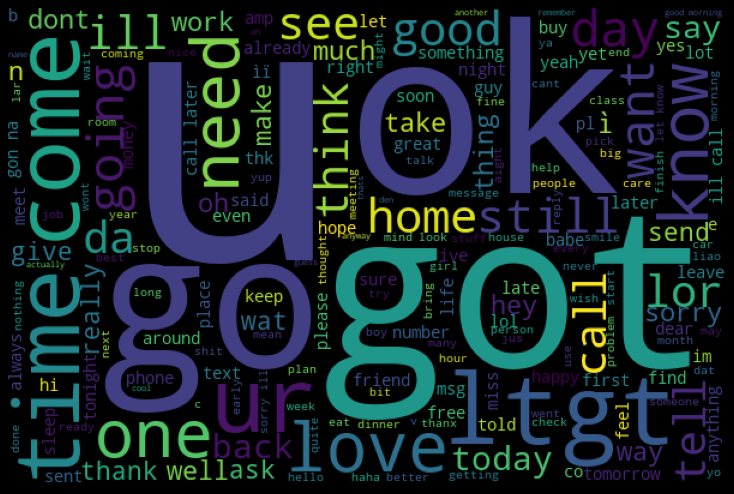

In [68]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [69]:
spam_words=[]
for w in range(len(spam_token_stopped)):
    #print(ham_token_stopped[w])
    for i in range(len(spam_token_stopped[w])):
       # print(ham_token_stopped[w][i])
        spam_words.append(spam_token_stopped[w][i])

In [70]:
spam_words

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 'overs',
 'freemsg',
 'hey',
 'darling',
 'weeks',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'å£',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'å£',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hours',
 'mobile',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 'six',
 'chances',
 'win',
 'cash',
 'pounds',
 'txt',
 'csh',
 'send',
 'cost',
 'pday',
 'days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'å£',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'tc',
 'wwwdbuknet',
 'lccltd',
 'pobox',
 'ldnwarw',
 'xxxmobilemovieclub',
 'us

In [71]:
len(spam_words)

10896

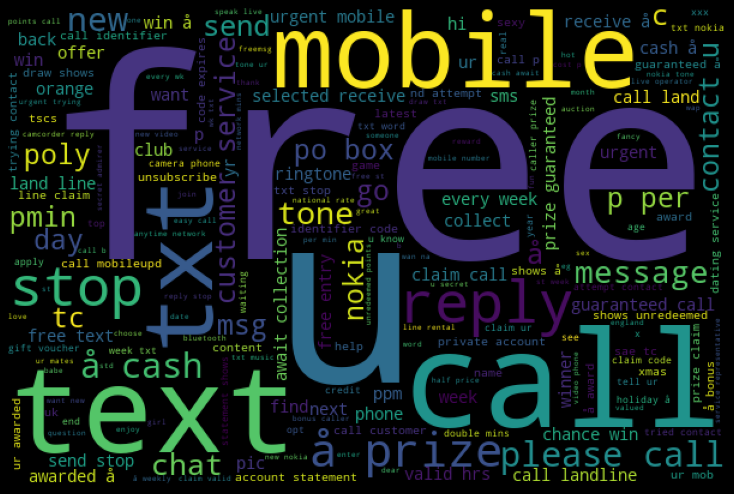

In [72]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [73]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u       988
get     307
ltgt    276
ok      272
go      249
got     244
ur      240
ill     236
know    232
like    229
dtype: int64


In [74]:
print("Top 10 spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 spam words are :

call      349
å£        270
free      219
u         155
txt       150
ur        144
mobile    124
text      121
stop      116
claim     113
dtype: int64


In [75]:
sms.head()

,label,msg,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
len(sms.msg[0])

111

In [77]:
txt=sms['msg']
nostop=[]

In [78]:


    for i in range(len(txt)):
        
        txt[i]=txt[i].lower()
        txt[i]=expand_contractions(txt[i])
        txt[i]=txt[i].translate( translate_table)
        txt[i] = re.sub('[0-9]+', '', txt[i])
        #ham_sent_tokens.append(nltk.word_tokenize(negative[i]))
        word=txt[i]
        words=[]
        for w in word.split():
            if w not in stopwords:
                words.append(w)
        nostop.append(words)

<ipython-input-78-44ffb3a6dff7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt[i]=txt[i].lower()
<ipython-input-78-44ffb3a6dff7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt[i]=expand_contractions(txt[i])
<ipython-input-78-44ffb3a6dff7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt[i]=txt[i].translate( translate_table)
<ipython-input-78-44ffb3a6dff7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [79]:
nostop

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  'overs'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'weeks',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'å£',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  'press',
  'copy',
  'friends',
  'callertune'],
 ['winner',
  '

In [80]:
len(nostop)

5572

In [81]:
a=pd.Series(nostop)
a

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [nd, time, tried, contact, u, u, å£, pound, pr...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Length: 5572, dtype: object

In [82]:
b=pd.DataFrame(a,columns=["txt"])
b

,txt
0,"[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, think, goes, usf, lives, around, though]"
...,...
5567,"[nd, time, tried, contact, u, u, å£, pound, pr..."
5568,"[ì, b, going, esplanade, fr, home]"
5569,"[pity, mood, soany, suggestions]"
5570,"[guy, bitching, acted, like, id, interested, b..."


In [83]:
c=sms.label
c

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [84]:
sms_pro=pd.concat([b,c],axis=1)
sms_pro

,txt,label
0,"[go, jurong, point, crazy, available, bugis, n...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",1
3,"[u, dun, say, early, hor, u, c, already, say]",0
4,"[nah, think, goes, usf, lives, around, though]",0
...,...,...
5567,"[nd, time, tried, contact, u, u, å£, pound, pr...",1
5568,"[ì, b, going, esplanade, fr, home]",0
5569,"[pity, mood, soany, suggestions]",0
5570,"[guy, bitching, acted, like, id, interested, b...",0


In [85]:
sms

,label,msg,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in a wkly comp to win fa cup final...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i do not think he goes to usf he lives aro...,61
...,...,...,...
5567,1,this is the nd time we have tried contact u u...,161
5568,0,will ì b going to esplanade fr home,37
5569,0,pity was in mood for that soany other suggest...,57
5570,0,the guy did some bitching but i acted like id ...,125


In [86]:
sms_pro["txt"] = sms_pro["txt"].agg(lambda x: ' '.join(map(str, x)))

In [87]:
sms_pro

,txt,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0
...,...,...
5567,nd time tried contact u u å£ pound prize claim...,1
5568,ì b going esplanade fr home,0
5569,pity mood soany suggestions,0
5570,guy bitching acted like id interested buying s...,0


## Creating Bag of Words

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(sms_pro['txt'])

In [89]:

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names()[20:40])


20 Bag of Words (BOW) Features: 

['absence', 'absolutely', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation']


In [90]:
print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))


Total number of vocab words :  8431


In [91]:
msg1=sms_pro['txt'][1]
msg1

'ok lar joking wif u oni'

Vector representation of this text

In [92]:
bow0 = bow_transformer.transform([msg1])
print(bow0)


  (0, 3668)	1
  (0, 3887)	1
  (0, 4989)	1
  (0, 5021)	1
  (0, 8055)	1


In [93]:
messages_bow = bow_transformer.transform(sms_pro['txt'])

In [94]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 8431)


In [95]:
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Amount of Non-Zero occurences:  44538


In [96]:
print(messages_bow[0])

  (0, 241)	1
  (0, 478)	1
  (0, 924)	1
  (0, 926)	1
  (0, 1254)	1
  (0, 1536)	1
  (0, 2820)	1
  (0, 2877)	1
  (0, 2916)	1
  (0, 3700)	1
  (0, 3851)	1
  (0, 5434)	1
  (0, 7924)	1
  (0, 8162)	1


In [97]:
print(messages_bow)

  (0, 241)	1
  (0, 478)	1
  (0, 924)	1
  (0, 926)	1
  (0, 1254)	1
  (0, 1536)	1
  (0, 2820)	1
  (0, 2877)	1
  (0, 2916)	1
  (0, 3700)	1
  (0, 3851)	1
  (0, 5434)	1
  (0, 7924)	1
  (0, 8162)	1
  (1, 3668)	1
  (1, 3887)	1
  (1, 4989)	1
  (1, 5021)	1
  (1, 8055)	1
  (2, 330)	1
  (2, 1370)	1
  (2, 1593)	1
  (2, 2195)	2
  (2, 2332)	2
  (2, 2457)	1
  :	:
  (5568, 2223)	1
  (5568, 2598)	1
  (5568, 2838)	1
  (5568, 3209)	1
  (5569, 4566)	1
  (5569, 5356)	1
  (5569, 6601)	1
  (5569, 6979)	1
  (5570, 61)	1
  (5570, 720)	1
  (5570, 960)	1
  (5570, 2139)	1
  (5570, 2611)	1
  (5570, 2730)	1
  (5570, 2980)	1
  (5570, 3360)	1
  (5570, 3494)	1
  (5570, 4004)	1
  (5570, 4783)	1
  (5570, 6625)	1
  (5570, 7717)	1
  (5570, 7975)	1
  (5571, 4696)	1
  (5571, 6054)	1
  (5571, 7525)	1


In [98]:
len(sms_pro['txt'])

5572

### TF-IDF

TF-IDF stands for **term frequency-inverse document frequency**, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

**TF(t)=Number of times term t appears in a document / Total number of terms in the document.**
 
**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

**IDF(t)=loge(Total number of documents / Number of documents with term t in it).**

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [100]:
tfidf0 = tfidf_transformer.transform(bow0)
print(tfidf0)

  (0, 8055)	0.4313385731102942
  (0, 5021)	0.5462557824449175
  (0, 4989)	0.2741803362458879
  (0, 3887)	0.4080505634471753
  (0, 3668)	0.5233273701797004


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [101]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8431)


In [102]:
print(messages_tfidf)

  (0, 8162)	0.23884387508143562
  (0, 7924)	0.197477676529277
  (0, 5434)	0.2708972231442673
  (0, 3851)	0.28394348086007304
  (0, 3700)	0.3463472678531778
  (0, 2916)	0.19277207278322067
  (0, 2877)	0.16253786508373455
  (0, 2820)	0.1568766084549576
  (0, 1536)	0.26822211749213126
  (0, 1254)	0.29259557146730675
  (0, 926)	0.29259557146730675
  (0, 924)	0.3306259044852361
  (0, 478)	0.2633690852304042
  (0, 241)	0.3463472678531778
  (1, 8055)	0.4313385731102942
  (1, 5021)	0.5462557824449175
  (1, 4989)	0.2741803362458879
  (1, 3887)	0.4080505634471753
  (1, 3668)	0.5233273701797004
  (2, 8114)	0.2022555982686363
  (2, 8069)	0.15763727558568782
  (2, 7578)	0.1339746892740317
  (2, 7371)	0.2343764561209857
  (2, 7211)	0.13093194421244184
  (2, 6780)	0.1670542449752627
  :	:
  (5568, 3209)	0.3660732290385455
  (5568, 2838)	0.3636095248537397
  (5568, 2598)	0.5628210076825846
  (5568, 2223)	0.6457639024659789
  (5569, 6979)	0.520467167163554
  (5569, 6601)	0.520467167163554
  (5569, 5356

**Lets convert our clean text into a representation that a machine learning model can understand. we'll use the Tf ifd for this**

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(sms_pro["txt"])




In [104]:
print(features.shape)

(5572, 8262)


In [105]:
print(len(vec.vocabulary_))

8262


In [106]:
print(features)

  (0, 7786)	0.19995345815712037
  (0, 230)	0.3506894305607562
  (0, 2809)	0.16457560558825957
  (0, 1226)	0.2962638480692937
  (0, 901)	0.33477096814205043
  (0, 3775)	0.2875032860269879
  (0, 8013)	0.24183826557783117
  (0, 2848)	0.19518886016165243
  (0, 903)	0.2962638480692937
  (0, 463)	0.26667094878285835
  (0, 1505)	0.2715848236082822
  (0, 5328)	0.2742934671141265
  (0, 3625)	0.3506894305607562
  (1, 4922)	0.5462557824449175
  (1, 7908)	0.4313385731102942
  (1, 3593)	0.5233273701797004
  (1, 3811)	0.4080505634471753
  (1, 4891)	0.2741803362458879
  (2, 5021)	0.25300034492756185
  (2, 316)	0.18185423392500233
  (2, 5674)	0.25300034492756185
  (2, 7437)	0.13595682991385358
  (2, 5621)	0.25300034492756185
  (2, 5727)	0.18010842259055138
  (2, 7082)	0.13286906777720367
  :	:
  (5567, 7209)	0.22575748913928276
  (5567, 7375)	0.33780667701878775
  (5567, 4635)	0.3174625644596497
  (5567, 1232)	0.2568263995958476
  (5567, 5492)	0.26977075431422776
  (5568, 2178)	0.6457639024659789
  (5

## Train Test Split

In [107]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, sms_pro['label'], test_size=0.2)

In [108]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

train dataset features size :  (4457, 8431)
train dataset label size (4457,)


In [109]:
print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

test dataset features size (1115, 8431)
test dataset lable size (1115,)


In [136]:
msg_test

<1115x8431 sparse matrix of type '<class 'numpy.float64'>'
	with 9445 stored elements in Compressed Sparse Row format>

## Building a ML Model 

In [110]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)

In [111]:
predict_train = spam_detect_model.predict(msg_train)

In [112]:
print("Classification Report \n",metrics.classification_report(label_train, predict_train))

Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3868
           1       1.00      0.79      0.89       589

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [113]:
print("Confusion Matrix \n",metrics.confusion_matrix(label_train, predict_train))

Confusion Matrix 
 [[3868    0]
 [ 121  468]]


In [114]:
"Accuracy of Train dataset : {0:0.3f}".format(metrics.accuracy_score(label_train, predict_train)*100)

'Accuracy of Train dataset : 97.285'

## Model Evaluation

In [115]:
label_predictions = spam_detect_model.predict(msg_test)

In [116]:
label_predictions

array([0, 0, 0, ..., 0, 0, 1])

In [117]:
print(metrics.classification_report(label_test, label_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.72      0.84       158

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [118]:
print(metrics.confusion_matrix(label_test, label_predictions))

[[957   0]
 [ 44 114]]


In [119]:
"Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(label_test, label_predictions)*100)

'Accuracy of the model : 96.054'

# Deep learning


In [120]:
sms

,label,msg,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in a wkly comp to win fa cup final...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i do not think he goes to usf he lives aro...,61
...,...,...,...
5567,1,this is the nd time we have tried contact u u...,161
5568,0,will ì b going to esplanade fr home,37
5569,0,pity was in mood for that soany other suggest...,57
5570,0,the guy did some bitching but i acted like id ...,125


In [121]:
doc=sms.msg
doc=np.array(doc)
doc

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs',
       ..., 'pity  was in mood for that soany other suggestions',
       'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], dtype=object)

In [122]:
label=sms.label
label=np.array(label)
label

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
from tensorflow.keras.preprocessing.text  import one_hot
# integer encode the documents
vocab_size = 10000
encoded_docs = [one_hot(d, vocab_size) for d in doc]
encoded_docs

[[667,
  2205,
  5532,
  8085,
  6896,
  4532,
  8686,
  6703,
  166,
  5008,
  5962,
  2302,
  2609,
  5668,
  3174,
  4205,
  7381,
  1647,
  9935,
  7508],
 [7027, 3101, 3523, 5616, 6439, 8473],
 [5474,
  1505,
  6703,
  8985,
  5952,
  9726,
  5288,
  946,
  7108,
  6703,
  2560,
  727,
  395,
  9927,
  5060,
  7108,
  5288,
  5288,
  2055,
  1505,
  3859,
  2135,
  1827,
  5934,
  415],
 [6439, 8883, 6072, 105, 6972, 7344, 6439, 3729, 2197, 6170, 6072],
 [728,
  8362,
  8776,
  2413,
  5603,
  2281,
  8110,
  5288,
  6965,
  2281,
  4601,
  1415,
  6682,
  2691],
 [6328,
  7755,
  7381,
  6824,
  3435,
  4717,
  2929,
  451,
  2262,
  7865,
  828,
  1963,
  6797,
  507,
  7109,
  1732,
  3322,
  8238,
  2902,
  3407,
  3435,
  7761,
  1042,
  7027,
  5563,
  2523,
  6804,
  5288,
  3675,
  9463,
  5288,
  8170],
 [5264,
  4771,
  5133,
  4717,
  2413,
  7109,
  5288,
  2929,
  6519,
  4432,
  9964,
  1897,
  4432,
  7109,
  6771,
  2505],
 [5502,
  7557,
  5920,
  7376,
  247,
  2

In [124]:
len(encoded_docs)

5572

In [125]:
encoded_docs[0]

[667,
 2205,
 5532,
 8085,
 6896,
 4532,
 8686,
 6703,
 166,
 5008,
 5962,
 2302,
 2609,
 5668,
 3174,
 4205,
 7381,
 1647,
 9935,
 7508]

In [126]:
sms.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [127]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 300
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs

array([[ 667, 2205, 5532, ...,    0,    0,    0],
       [7027, 3101, 3523, ...,    0,    0,    0],
       [5474, 1505, 6703, ...,    0,    0,    0],
       ...,
       [1739, 6601, 6703, ...,    0,    0,    0],
       [3209, 4373, 3574, ...,    0,    0,    0],
       [ 659, 2078, 1528, ...,    0,    0,    0]])

In [128]:

import tensorflow as tf

In [129]:
tf.__version__

'2.3.0'

In [130]:

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [131]:

## Creating model
embedding_vector_features=200
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 200)          2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,120,501
Trainable params: 2,120,501
Non-trainable params: 0
_________________________________________________________________
None


In [132]:
model.fit(padded_docs, label, epochs=10,batch_size=64)


In [133]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, label)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 86.593682


In [142]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=max_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [143]:
model.fit(padded_docs, label, epochs=10,batch_size=32)


Epoch 1/10
175/175 [==============================] - 25s 142ms/step - loss: 0.2022 - accuracy: 0.9336
Epoch 2/10
175/175 [==============================] - 31s 175ms/step - loss: 0.0505 - accuracy: 0.9873
Epoch 3/10
175/175 [==============================] - 31s 177ms/step - loss: 0.0336 - accuracy: 0.9912
Epoch 4/10
175/175 [==============================] - 31s 177ms/step - loss: 0.0258 - accuracy: 0.9943
Epoch 5/10
175/175 [==============================] - 30s 171ms/step - loss: 0.0136 - accuracy: 0.9966
Epoch 6/10
175/175 [==============================] - 30s 171ms/step - loss: 0.0074 - accuracy: 0.9978
Epoch 7/10
175/175 [==============================] - 29s 168ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 8/10
175/175 [==============================] - 29s 166ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 9/10
175/175 [==============================] - 29s 164ms/step - loss: 0.0034 - accuracy: 0.9989
Epoch 10/10
175/175 [==============================] - 29s 165ms/step - l

In [139]:
from tensorflow.keras.layers import Bidirectional

In [144]:
loss, accuracy = model.evaluate(padded_docs, label)
print('Accuracy: %f' % (accuracy*100))

175/175 [==============================] - 9s 50ms/step - loss: 0.0036 - accuracy: 0.9986
Accuracy: 99.856424
